### Basic ML model to gain intuition - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv('algorithm_dataset.csv')

In [2]:
df

,Date,Open,High,Low,Close,debt_securities > 2yrs,excess_reserves,bank_notes_in_circulation,current_account,interest_rate_on_loans,...,interest_rate_10yrs,yield_curve_spot_rate,revenue_EU19,gov_change_debt_%_GDP_EU19,Vol.,% var.,M1,real_eff_exchange_rate,CPI,confidence_sentiment
0,2020-09-30,81.58,83.47,80.79,82.68,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,...,1.660470e+08,-0.495366,-0.495366,0.878000,"67,07M","0,99%",97.76,14163.053,97.76,98.70532
1,2020-09-29,83.48,83.48,81.79,81.87,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,...,1.660470e+08,-0.501436,-0.501436,0.878000,"56,67M","-2,22%",97.76,14163.053,97.76,98.70532
2,2020-09-28,80.02,83.76,80.02,83.73,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,...,1.660470e+08,-0.500158,-0.500158,0.878000,"84,35M","5,63%",97.76,14163.053,97.76,98.70532
3,2020-09-25,80.44,80.97,78.89,79.27,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,...,1.660470e+08,-0.496329,-0.496329,0.878000,"66,55M","-1,23%",97.76,14163.053,97.76,98.70532
4,2020-09-24,80.16,81.49,79.02,80.26,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,...,1.660470e+08,-0.488148,-0.488148,0.878000,"74,71M","-0,38%",97.76,14163.053,97.76,98.70532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2016-01-11,166.89,170.25,166.89,167.26,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,...,1.399033e+08,0.703122,0.703122,0.720461,"72,87M","-1,59%",93.30,10916.525,93.30,101.02480
1067,2016-01-08,171.10,173.12,167.18,167.18,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,...,1.399033e+08,0.676140,0.676140,0.720461,"215,23M","-1,79%",93.30,10916.525,93.30,101.02480
1068,2016-01-07,173.75,173.75,168.21,170.97,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,...,1.399033e+08,0.701225,0.701225,0.720461,"176,78M","0,41%",93.30,10916.525,93.30,101.02480
1069,2016-01-06,178.49,178.49,174.40,175.22,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,...,1.399033e+08,0.663953,0.663953,0.720461,"188,75M","-1,68%",93.30,10916.525,93.30,101.02480


#### Extract date

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')#Ojo que aquí estás volviendo a pasarlo a string.

In [4]:
df['Date']

0      2020-09-30
1      2020-09-29
2      2020-09-28
3      2020-09-25
4      2020-09-24
          ...    
1066   2016-01-11
1067   2016-01-08
1068   2016-01-07
1069   2016-01-06
1070   2016-01-04
Name: Date, Length: 1071, dtype: datetime64[ns]

#### Vol to float

In [3]:
df['Vol.'] = df['Vol.'].str.slice(0, -1) # Remove M
df['Vol.'].replace(',','.', inplace = True, regex = True) # Set . as floating point
df['Vol.'] = pd.to_numeric(df['Vol.'], downcast = 'float') # Convert to numeric

In [6]:
df['Vol.']

0        67.070000
1        56.669998
2        84.349998
3        66.550003
4        74.709999
           ...    
1066     72.870003
1067    215.229996
1068    176.779999
1069    188.750000
1070    133.369995
Name: Vol., Length: 1071, dtype: float32

#### var to float

In [4]:
df['% var.'] = df['% var.'].str.slice(0, -1)
df['% var.'].replace(',','.', inplace = True, regex = True)
df['% var.'] = pd.to_numeric(df['% var.'], downcast = 'float')

In [8]:
df['% var.']

0       0.99
1      -2.22
2       5.63
3      -1.23
4      -0.38
        ... 
1066   -1.59
1067   -1.79
1068    0.41
1069   -1.68
1070   -1.26
Name: % var., Length: 1071, dtype: float32

### EDA

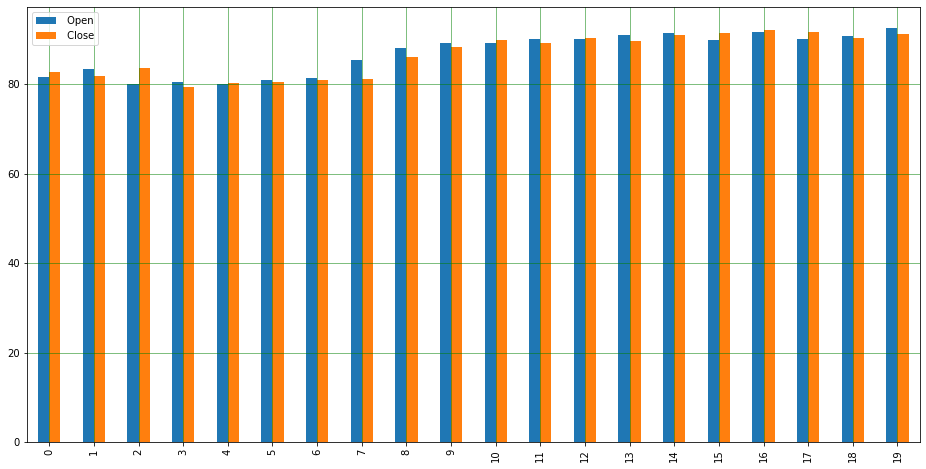

In [9]:
#Plot Open vs Close
df[[' Open',' Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

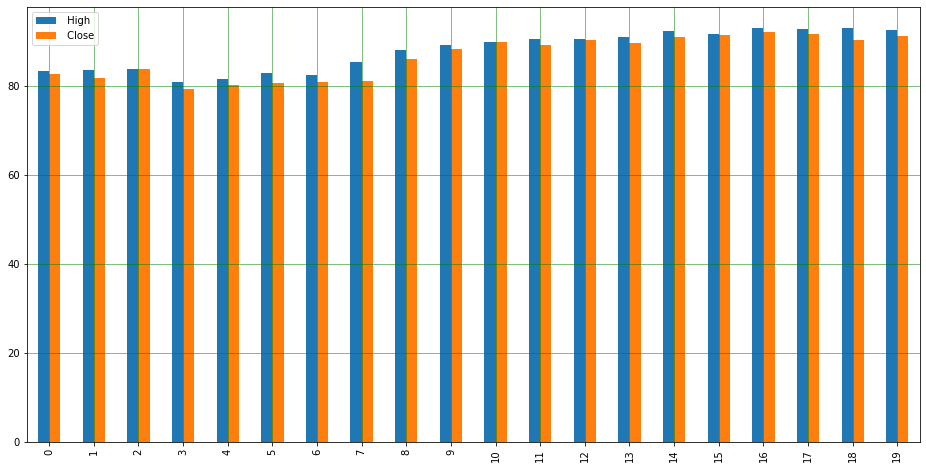

In [12]:
#Plot High vs Close
df[[' High',' Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Remove leaking columns

In [5]:
df.drop([' Open',' High',' Low'], axis = 1, inplace = True)

#### Set index

Usamos el datetime como índice del dataframe

In [6]:
df.index = df['Date']
#df.drop(columns='Date', inplace=True)
df=df.sort_index(ascending=True,axis=0)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [7]:
# Esta parte de aquí a priori no es necesaria.
# Podemos usar el index

b = df['Date'].tolist()
d = [dt.datetime.strptime(w, '%Y-%m-%d').date() for w in b]
a=[]
for i in d:
    w = i.toordinal()
    a.append(w)

time_base = d[0].toordinal()
a = [abs((time_base-z)) for z in a]
df['Date_i'] = a

In [13]:
df

,Date,Close,debt_securities > 2yrs,excess_reserves,bank_notes_in_circulation,current_account,interest_rate_on_loans,index_debt_securities,HICP,building_permits,...,yield_curve_spot_rate,revenue_EU19,gov_change_debt_%_GDP_EU19,Vol.,% var.,M1,real_eff_exchange_rate,CPI,confidence_sentiment,Date_i
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,177.95,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,111.812666,98.56,92.7,...,0.702713,0.702713,0.720461,133.369995,-1.26,93.30,10916.525,93.30,101.02480,0
2016-01-06,2016-01-06,175.22,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,111.812666,98.56,92.7,...,0.663953,0.663953,0.720461,188.750000,-1.68,93.30,10916.525,93.30,101.02480,2
2016-01-07,2016-01-07,170.97,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,111.812666,98.56,92.7,...,0.701225,0.701225,0.720461,176.779999,0.41,93.30,10916.525,93.30,101.02480,3
2016-01-08,2016-01-08,167.18,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,111.812666,98.56,92.7,...,0.676140,0.676140,0.720461,215.229996,-1.79,93.30,10916.525,93.30,101.02480,4
2016-01-11,2016-01-11,167.26,3.639120e+06,4.438230e+05,1.072789e+06,5.571045e+05,-0.05,111.812666,98.56,92.7,...,0.703122,0.703122,0.720461,72.870003,-1.59,93.30,10916.525,93.30,101.02480,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,2020-09-24,80.26,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,132.434384,104.96,127.0,...,-0.488148,-0.488148,0.878000,74.709999,-0.38,97.76,14163.053,97.76,98.70532,1725
2020-09-25,2020-09-25,79.27,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,132.434384,104.96,127.0,...,-0.496329,-0.496329,0.878000,66.550003,-1.23,97.76,14163.053,97.76,98.70532,1726
2020-09-28,2020-09-28,83.73,3.628945e+06,2.483302e+06,1.381216e+06,2.625680e+06,0.01,132.434384,104.96,127.0,...,-0.500158,-0.500158,0.878000,84.349998,5.63,97.76,14163.053,97.76,98.70532,1729


#### Check historical tendency

In [14]:
df.columns

Index(['Date', ' Close', 'debt_securities > 2yrs', 'excess_reserves',
       'bank_notes_in_circulation', 'current_account',
       'interest_rate_on_loans', 'index_debt_securities', 'HICP',
       'building_permits', 'industrial_new_orders', 'commodities_index',
       'total_employment', 'labour_cost_index', 'total_trade_volume',
       'interest_rate_10yrs', 'yield_curve_spot_rate', 'revenue_EU19',
       'gov_change_debt_%_GDP_EU19', 'Vol.', '% var.', 'M1',
       'real_eff_exchange_rate', 'CPI', 'confidence_sentiment', 'Date_i'],
      dtype='object')

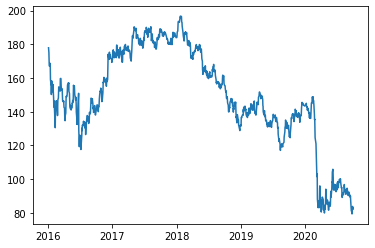

In [188]:
plt.plot(df[' Close'], label='Close Price history')

#### Train test split

In [8]:
train = df.loc[df['Date']<'2018-01-01']
test = df.loc[(df['Date']>='2018-01-01') & (df['Date']<='2018-12-28')]

In [9]:
X_train = train.drop(columns=[' Close', 'Date', 'Date_i'])
y_train = train[' Close']
X_test = test.drop(columns=[' Close', 'Date', 'Date_i'])
y_test = test[' Close']

In [15]:
X_test

,debt_securities > 2yrs,excess_reserves,bank_notes_in_circulation,current_account,interest_rate_on_loans,index_debt_securities,HICP,building_permits,industrial_new_orders,commodities_index,...,interest_rate_10yrs,yield_curve_spot_rate,revenue_EU19,gov_change_debt_%_GDP_EU19,Vol.,% var.,M1,real_eff_exchange_rate,CPI,confidence_sentiment
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,3384130.363,1.151412e+06,1.158168e+06,1.275156e+06,-0.02,115.465219,101.56,111.6,112.35,97.08,...,1.763920e+08,0.537615,0.537615,0.720689,62.000000,-0.08,103.09,11916.558,103.09,102.1805
2018-01-03,3384130.363,1.151412e+06,1.158168e+06,1.275156e+06,-0.02,115.465219,101.56,111.6,112.35,97.08,...,1.763920e+08,0.521837,0.521837,0.720689,55.009998,-0.88,103.09,11916.558,103.09,102.1805
2018-01-05,3384130.363,1.151412e+06,1.158168e+06,1.275156e+06,-0.02,115.465219,101.56,111.6,112.35,97.08,...,1.763920e+08,0.523487,0.523487,0.720689,44.910000,-0.11,103.09,11916.558,103.09,102.1805
2018-01-08,3384130.363,1.151412e+06,1.158168e+06,1.275156e+06,-0.02,115.465219,101.56,111.6,112.35,97.08,...,1.763920e+08,0.506896,0.506896,0.720689,82.290001,-0.86,103.09,11916.558,103.09,102.1805
2018-01-10,3384130.363,1.151412e+06,1.158168e+06,1.275156e+06,-0.02,115.465219,101.56,111.6,112.35,97.08,...,1.763920e+08,0.567946,0.567946,0.720689,73.959999,-0.74,103.09,11916.558,103.09,102.1805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,3520795.000,1.252605e+06,1.202409e+06,1.379364e+06,-0.01,118.268651,104.05,137.7,109.90,101.51,...,1.615528e+08,0.304867,0.304867,0.720689,70.230003,0.19,106.79,12384.302,106.79,101.0212
2018-12-20,3520795.000,1.252605e+06,1.202409e+06,1.379364e+06,-0.01,118.268651,104.05,137.7,109.90,101.51,...,1.615528e+08,0.285043,0.285043,0.720689,91.470001,-2.48,106.79,12384.302,106.79,101.0212
2018-12-21,3520795.000,1.252605e+06,1.202409e+06,1.379364e+06,-0.01,118.268651,104.05,137.7,109.90,101.51,...,1.615528e+08,0.301981,0.301981,0.720689,141.600006,-0.13,106.79,12384.302,106.79,101.0212


In [22]:
'''
y_test_list = y_test.tolist()
y_test_inv = reversed(y_test_list)

y_test = pd.Series(y_test_inv,dtype=float)

x_train = x_train.drop([' Close'], axis = 1)
x_test = x_test.drop([' Close'], axis = 1)

s = x.loc[x['Date']<='2018-12-28']
y_cross = s[' Close']
x_cross = s.drop([' Close'], axis = 1)
aa = [x_train,x_test,x_cross]
for a in aa:
    a.drop(['Date'], axis = 1, inplace=True)
'''

"\ny_test_list = y_test.tolist()\ny_test_inv = reversed(y_test_list)\n\ny_test = pd.Series(y_test_inv,dtype=float)\n\nx_train = x_train.drop([' Close'], axis = 1)\nx_test = x_test.drop([' Close'], axis = 1)\n\ns = x.loc[x['Date']<='2018-12-28']\ny_cross = s[' Close']\nx_cross = s.drop([' Close'], axis = 1)\naa = [x_train,x_test,x_cross]\nfor a in aa:\n    a.drop(['Date'], axis = 1, inplace=True)\n"

#### Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#### Model creation

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#### Prediction

In [11]:
y_pred = lr.predict(X_test)

In [14]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rms

18.92451640293258

In [12]:
predicted_price = pd.Series(data=y_pred, index=y_test.index)

In [13]:
dec = X_test.loc['2018-12-28']
coeffs = list(lr.coef_)
dec_list = []
for z in range(len(coeffs)):
    dec_list.append(coeffs[z]*dec[z])
total_sum = 0.0
for b in dec_list:
    total_sum = total_sum + b

y_lr = lr.intercept_ + b



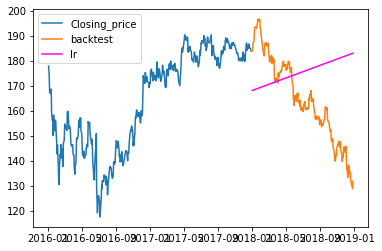

In [53]:
price_values = [predicted_price[0],y_lr]
date_values = [X_test.index[0],X_test.index[-1]]

plt.plot(y_train, label = 'Closing_price')
plt.plot(y_test, label = 'backtest')
plt.plot(date_values,price_values, label = 'lr', color = 'magenta')
plt.xlabel = ('Date')
plt.ylabel = ('Closing_price')
plt.legend(loc = 'upper left')

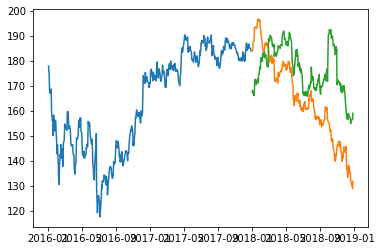

In [25]:
plt.plot(y_train)
plt.plot(y_test)
plt.plot(predicted_price)




## ARIMA Series

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima.arima import auto_arima

auto_model = auto_arima(y_train.to_numpy(), exogenous=X_train.to_numpy(), m=2, seasonal=True,
                        suppress_warnings = True,  
                        step_wise=True, trace=True)           
auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[2] intercept   : AIC=2086.672, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[2] intercept   : AIC=2379.339, Time=0.71 sec
 ARIMA(1,0,0)(1,1,0)[2] intercept   : AIC=2225.644, Time=0.99 sec
 ARIMA(0,0,1)(0,1,1)[2] intercept   : AIC=2077.670, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[2]             : AIC=4659.388, Time=0.60 sec
 ARIMA(0,0,1)(0,1,0)[2] intercept   : AIC=2078.980, Time=0.67 sec
 ARIMA(0,0,1)(1,1,1)[2] intercept   : AIC=2080.217, Time=0.83 sec
 ARIMA(0,0,1)(0,1,2)[2] intercept   : AIC=2067.766, Time=2.21 sec
 ARIMA(0,0,1)(1,1,2)[2] intercept   : AIC=2068.728, Time=0.94 sec
 ARIMA(0,0,0)(0,1,2)[2] intercept   : AIC=2366.562, Time=1.99 sec
 ARIMA(1,0,1)(0,1,2)[2] intercept   : AIC=2073.465, Time=2.26 sec
 ARIMA(1,0,0)(0,1,2)[2] intercept   : AIC=2232.752, Time=0.86 sec
 ARIMA(0,0,1)(0,1,2)[2]             : AIC=2065.866, Time=1.93 sec
 ARIMA(0,0,1)(0,1,1)[2]             : AIC=2075.629, Time=0.73 sec
 ARIMA(0,0,1)(1,1,2)[2]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  449
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 2)   Log Likelihood               -1005.933
Date:                                Wed, 30 Jun 2021   AIC                           2065.866
Time:                                        11:25:13   BIC                           2176.635
Sample:                                             0   HQIC                          2109.536
                                                - 449                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.114e-05   9.08e-05     -1.004      0.315      -0.000    8.68e-05
x2         -7.739e-05      0.002     -0.035      0.972      -0.004       0.004
x3          6.327e-06   8.95e-06      0.707      0.480   -1.12e-05    2.39e-05
x4          5.039e-05      0.002      0.023      0.981      -0.004       0.004
x5           -95.5750      0.006  -1.53e+04      0.000     -95.587     -95.563
x6            -0.6490      0.117     -5.536      0.000      -0.879      -0.419
x7             2.0711      0.099     20.889      0.000       1.877       2.265
x8            -0.0773      0.088     -0.882      0.378      -0.249       0.094
x9            -0.6509      0.821     -0.792      0.428      -2.261       0.959
x10           -0.4491      0.791     -0.568      0.570      -2.000       1.102
x11           -0.0004      0.002     -0.193      0.847      -0.005       0.004
x12            0.0986      0.246      0.400      0.689      -0.384       0.581
x13         1.419e-07   7.91e-08      1.795      0.073    -1.3e-08    2.97e-07
x14        -1.967e-07   7.91e-08     -2.488      0.013   -3.52e-07   -4.18e-08
x15           19.2473      0.021    899.666      0.000      19.205      19.289
x16           19.2473      0.021    899.666      0.000      19.205      19.289
x17          -91.3513      0.001  -1.09e+05      0.000     -91.353     -91.350
x18           -0.0026      0.002     -1.540      0.124      -0.006       0.001
x19            0.4621      0.043     10.703      0.000       0.378       0.547
x20           -0.1682      0.681     -0.247      0.805      -1.502       1.166
x21           -0.0047      0.039     -0.119      0.906      -0.082       0.072
x22           -0.1682      0.681     -0.247      0.805      -1.502       1.166
x23            2.8966      0.035     82.099      0.000       2.827       2.966
ma.L1          0.8223      0.054     15.368      0.000       0.717       0.927
ma.S.L2       -0.0376      0.054     -0.697      0.486      -0.143       0.068
ma.S.L4       -0.2054      0.061     -3.390      0.001      -0.324      -0.087
sigma2         6.3038      0.440     14.339      0.000       5.442       7.165
===================================================================================
Ljung-Box (L1) (Q):                  17.56   Jarque-Bera (JB):               380.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.09e+22. Standard errors may be unstable.
"""

In [15]:

model = SARIMAX(endog=y_train.to_numpy(), exog=X_train.to_numpy().astype(float), 
                order=(0, 0, 1),seasonal_order=(0, 1, 2, 2))
model = model.fit(disp=False)
model.summary()

/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  449
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 2)   Log Likelihood               -1005.933
Date:                                Wed, 30 Jun 2021   AIC                           2065.866
Time:                                        11:25:26   BIC                           2176.635
Sample:                                             0   HQIC                          2109.536
                                                - 449                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.114e-05   9.08e-05     -1.004      0.315      -0.000    8.68e-05
x2         -7.739e-05      0.002     -0.035      0.972      -0.004       0.004
x3          6.327e-06   8.95e-06      0.707      0.480   -1.12e-05    2.39e-05
x4          5.039e-05      0.002      0.023      0.981      -0.004       0.004
x5           -95.5750      0.006  -1.53e+04      0.000     -95.587     -95.563
x6            -0.6490      0.117     -5.536      0.000      -0.879      -0.419
x7             2.0711      0.099     20.889      0.000       1.877       2.265
x8            -0.0773      0.088     -0.882      0.378      -0.249       0.094
x9            -0.6509      0.821     -0.792      0.428      -2.261       0.959
x10           -0.4491      0.791     -0.568      0.570      -2.000       1.102
x11           -0.0004      0.002     -0.193      0.847      -0.005       0.004
x12            0.0986      0.246      0.400      0.689      -0.384       0.581
x13         1.419e-07   7.91e-08      1.795      0.073    -1.3e-08    2.97e-07
x14        -1.967e-07   7.91e-08     -2.488      0.013   -3.52e-07   -4.18e-08
x15           19.2473      0.021    899.666      0.000      19.205      19.289
x16           19.2473      0.021    899.666      0.000      19.205      19.289
x17          -91.3513      0.001  -1.09e+05      0.000     -91.353     -91.350
x18           -0.0026      0.002     -1.540      0.124      -0.006       0.001
x19            0.4621      0.043     10.703      0.000       0.378       0.547
x20           -0.1682      0.681     -0.247      0.805      -1.502       1.166
x21           -0.0047      0.039     -0.119      0.906      -0.082       0.072
x22           -0.1682      0.681     -0.247      0.805      -1.502       1.166
x23            2.8966      0.035     82.099      0.000       2.827       2.966
ma.L1          0.8223      0.054     15.368      0.000       0.717       0.927
ma.S.L2       -0.0376      0.054     -0.697      0.486      -0.143       0.068
ma.S.L4       -0.2054      0.061     -3.390      0.001      -0.324      -0.087
sigma2         6.3038      0.440     14.339      0.000       5.442       7.165
===================================================================================
Ljung-Box (L1) (Q):                  17.56   Jarque-Bera (JB):               380.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.09e+22. Standard errors may be unstable.
"""

In [16]:
y_pred_arima = model.predict(start = 1, end = 227,exog=X_test.to_numpy().astype(float))


<AxesSubplot:>

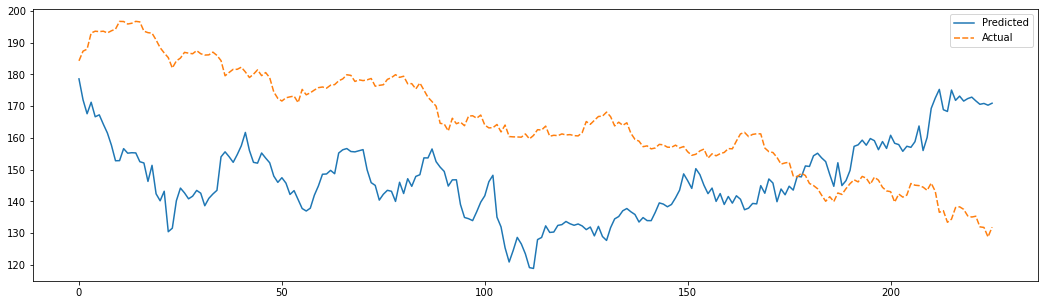

In [28]:
import seaborn as sns

plt.figure(figsize=(18,5))
sns.lineplot(data=pd.DataFrame({'Predicted':y_pred_arima[1:],'Actual':y_test[1:].to_numpy()}))

## LSTM MODEL

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/thesis/lib/python3.7/sit

In [18]:
X_train_a = train.drop(columns=[' Close', 'Date', 'Date_i'])
y_train_a = train[' Close']
X_test_a = test.drop(columns=[' Close', 'Date', 'Date_i'])
y_test_a = test[' Close']

In [19]:
from sklearn.preprocessing import MinMaxScaler

a = MinMaxScaler()

X_train_a = a.fit_transform(X_train_a)
X_test_a = a.transform(X_test_a)


In [28]:
X_test_a

array([[-0.0235409 ,  0.95240166,  1.01121492, ...,  1.04459981,
         1.20043573,  0.97064568],
       [-0.0235409 ,  0.95240166,  1.01121492, ...,  1.04459981,
         1.20043573,  0.97064568],
       [-0.0235409 ,  0.95240166,  1.01121492, ...,  1.04459981,
         1.20043573,  0.97064568],
       ...,
       [ 0.52503666,  1.0883731 ,  1.05408333, ...,  1.53318897,
         1.60348584,  0.32367878],
       [ 0.52503666,  1.0883731 ,  1.05408333, ...,  1.53318897,
         1.60348584,  0.32367878],
       [ 0.52503666,  1.0883731 ,  1.05408333, ...,  1.53318897,
         1.60348584,  0.32367878]])

In [40]:
y_train_a.shape

(449,)

In [20]:
# LSTM layer expects inputs to have shape of (batch_size, timesteps, input_dim)
X_train_a = X_train_a.reshape(-1, 1, 23)
X_test_a  = X_test_a.reshape(-1, 1, 23)
y_train_a = y_train_a.values.reshape(-1, 1, 1)
y_test_a = y_test_a.values.reshape(-1, 1, 1)


In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 23), return_sequences=True))
model.add(LSTM(50, input_shape=(1, 23), return_sequences=True, activation = 'sigmoid'))
model.add(LSTM(40, input_shape=(1, 23), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(X_train_a, y_train_a, epochs=600, batch_size=32, verbose=2) 

: 376.9654
Epoch 46/600
 - 0s - loss: 376.8698
Epoch 47/600
 - 0s - loss: 376.9155
Epoch 48/600
 - 0s - loss: 376.8580
Epoch 49/600
 - 0s - loss: 376.9726
Epoch 50/600
 - 0s - loss: 376.8912
Epoch 51/600
 - 0s - loss: 376.8892
Epoch 52/600
 - 0s - loss: 376.8255
Epoch 53/600
 - 0s - loss: 376.9857
Epoch 54/600
 - 0s - loss: 376.9695
Epoch 55/600
 - 0s - loss: 376.8412
Epoch 56/600
 - 0s - loss: 376.9635
Epoch 57/600
 - 0s - loss: 376.6474
Epoch 58/600
 - 0s - loss: 376.8502
Epoch 59/600
 - 0s - loss: 376.9638
Epoch 60/600
 - 0s - loss: 376.7749
Epoch 61/600
 - 0s - loss: 377.0905
Epoch 62/600
 - 0s - loss: 377.5706
Epoch 63/600
 - 0s - loss: 376.9887
Epoch 64/600
 - 0s - loss: 377.1331
Epoch 65/600
 - 0s - loss: 376.8237
Epoch 66/600
 - 0s - loss: 376.8524
Epoch 67/600
 - 0s - loss: 377.2916
Epoch 68/600
 - 0s - loss: 377.0109
Epoch 69/600
 - 0s - loss: 377.3164
Epoch 70/600
 - 0s - loss: 376.9155
Epoch 71/600
 - 0s - loss: 376.8486
Epoch 72/600
 - 0s - loss: 376.8439
Epoch 73/600
 - 0

In [25]:
model_a = model.fit(X_train_a, y_train_a, epochs=600, batch_size=32, verbose=2) 

00
 - 0s - loss: 376.9728
Epoch 46/600
 - 0s - loss: 377.0025
Epoch 47/600
 - 0s - loss: 376.7506
Epoch 48/600
 - 0s - loss: 376.7426
Epoch 49/600
 - 0s - loss: 377.1942
Epoch 50/600
 - 0s - loss: 378.2139
Epoch 51/600
 - 0s - loss: 377.1174
Epoch 52/600
 - 0s - loss: 377.1826
Epoch 53/600
 - 0s - loss: 376.4173
Epoch 54/600
 - 0s - loss: 376.5155
Epoch 55/600
 - 0s - loss: 376.5301
Epoch 56/600
 - 0s - loss: 376.2622
Epoch 57/600
 - 0s - loss: 376.5121
Epoch 58/600
 - 0s - loss: 377.3563
Epoch 59/600
 - 0s - loss: 377.4741
Epoch 60/600
 - 0s - loss: 377.6586
Epoch 61/600
 - 0s - loss: 376.6517
Epoch 62/600
 - 0s - loss: 376.2638
Epoch 63/600
 - 0s - loss: 376.4899
Epoch 64/600
 - 0s - loss: 376.4550
Epoch 65/600
 - 0s - loss: 376.6637
Epoch 66/600
 - 0s - loss: 376.9156
Epoch 67/600
 - 0s - loss: 377.4971
Epoch 68/600
 - 0s - loss: 377.2755
Epoch 69/600
 - 0s - loss: 377.3716
Epoch 70/600
 - 0s - loss: 377.5552
Epoch 71/600
 - 0s - loss: 377.7077
Epoch 72/600
 - 0s - loss: 377.3376
Ep

In [26]:
epochs_loss_df = pd.DataFrame(model_a.history) 

Text(0, 0.5, 'loss')

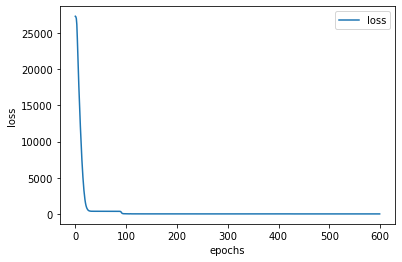

In [29]:
epochs_loss = epochs_loss_df.plot()
epochs_loss.set_xlabel("epochs")
epochs_loss.set_ylabel("loss")


In [23]:
y_closing_price = model.predict(X_test_a)


In [24]:
pred_lstm_a = np.ndarray.tolist(y_closing_price)

In [25]:
pred_lstm = []
for a in pred_lstm_a:
    for b in a:
        for c in b:
            pred_lstm.append(c)

## RESULT TABLES & COMBINED GRAPHS


In [26]:
#BSM
non_trading_days_bsm = ['2018-01-01','2018-03-30','2018-04-02','2018-05-01','2018-05-21','2018-10-03','2018-12-24','2018-12-25','2018-12-26','2018-12-31']
bsm_pred_df = pd.read_excel ('\Daily_check.xlsx', engine = 'openpyxl')
bsm_pred_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
bsm_pred_df.dtypes
bsm_pred_df['Date'] = pd.to_datetime(bsm_pred_df['Date'])
bsm_pred_df = bsm_pred_df[~bsm_pred_df['Date'].isin(non_trading_days_bsm)]
bsm_pred_df = bsm_pred_df[['Date','Avg']]
bsm_pred_df 

#backtested_prices
pred_df = pd.DataFrame(test[' Close']) 
pred_df = pd.merge(pred_df,bsm_pred_df, left_on = 'Date', right_on = 'Date', how='left')
pred_df.rename(columns={'Avg': 'BSM_pred'}, inplace=True) 

#LR
predicted_price_lr = pd.Series.tolist(predicted_price)
pred_df['LR_pred'] = predicted_price_lr

#ARIMA
pred_arima = np.ndarray.tolist(y_pred_arima)
pred_df['ARIMA_pred'] = pred_arima

#LSTM
pred_df['LSTM_pred'] = pred_lstm


In [99]:
pred_df

,Date,Close,BSM_pred,LR_pred,ARIMA_pred,LSTM_pred
0,2018-01-02,184.00,183.877766,168.171529,-211.988796,173.273987
1,2018-01-03,184.25,183.845190,167.103099,178.555451,172.600677
2,2018-01-05,187.29,183.850473,167.641934,171.955310,172.817535
3,2018-01-08,187.93,183.726530,166.057390,167.571790,171.792664
4,2018-01-10,193.01,183.753046,169.263220,171.198628,174.352081
...,...,...,...,...,...,...
222,2018-12-19,135.29,179.677607,157.328224,171.621003,167.208847
223,2018-12-20,131.93,179.852442,154.907677,170.550780,165.734772
224,2018-12-21,131.76,179.858293,156.240713,170.815261,166.352722
225,2018-12-27,128.76,179.801860,156.493277,170.265535,166.938202


### MSE

In [27]:
def mse (actual,pred):
    sum_errors = 0
    for a in range(len(actual)):
        diff = actual[a]-pred[a]
        diff_squared = diff**2
        sum_errors += diff_squared
    MSE = sum_errors/(len(actual))
    return MSE

In [28]:
y_backtest = pred_df[' Close'].tolist()
#MSE BSM
y_bsm = pred_df['BSM_pred'].tolist()
mse_bsm = mse(y_backtest,y_bsm)
series_pred_bsm = pd.Series(data=y_bsm, index=y_test.index)
#MSE LR
y_lr = pred_df['LR_pred'].tolist()
mse_lr = mse(y_backtest,y_lr)
series_pred_lr = pd.Series(data=y_lr, index=y_test.index)
#MSE ARIMA
y_arima = pred_df['ARIMA_pred'].tolist()
y_arima[0] = 183.0
mse_arima = mse(y_backtest,y_arima)
series_pred_arima = pd.Series(data=y_arima, index=y_test.index)
#MSE LSTM
y_lstm = pred_lstm
mse_lstm = mse(y_backtest,y_lstm)
series_pred_lstm = pd.Series(data=y_lstm, index=y_test.index)


In [53]:
mse_lstm

253.62718485449105

In [48]:
predictions_backtested = pred_df.to_excel('\predictions_backtested.xlsx')

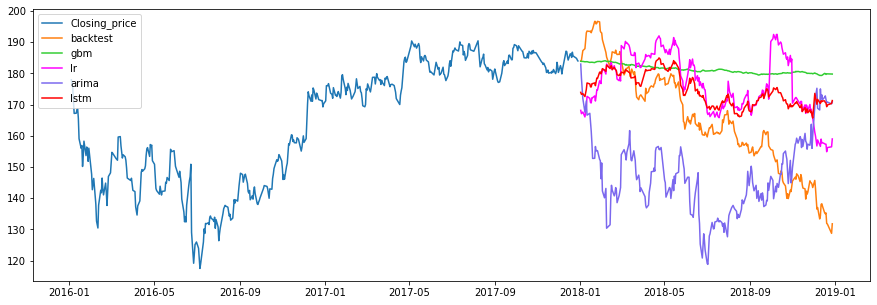

In [29]:
plt.figure(figsize = (15,5))
plt.plot(y_train, label = 'Closing_price')
plt.plot(y_test, label = 'backtest')
plt.xlabel = ('Date')
plt.ylabel = ('Closing_price')
plt.plot(series_pred_bsm, label = 'gbm', color = 'limegreen')
plt.plot(series_pred_lr, label = 'lr', color = 'magenta')
plt.plot(series_pred_arima, label = 'arima', color = 'mediumslateblue')
plt.plot(series_pred_lstm, label = 'lstm', color = 'red')
plt.legend(loc = 'upper left')

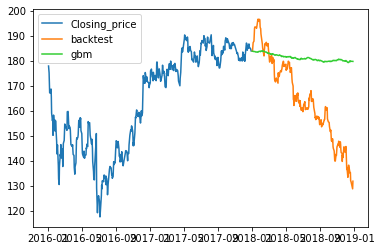

In [30]:
plt.plot(y_train, label = 'Closing_price')
plt.plot(y_test, label = 'backtest')
plt.xlabel = ('Date')
plt.ylabel = ('Closing_price')
plt.plot(series_pred_bsm, label = 'gbm', color = 'limegreen')
plt.legend(loc = 'upper left')

## TRADING FACTOR

In [67]:
daily_diff = []
algos = [y_bsm,y_lr,y_arima,y_lstm]
success_trades = [0,0,0,0]
total_trades = len(y_backtest)
for a in range(len(y_backtest)-1):
    for b in range(len(algos)):
        if y_backtest[a]<=y_backtest[a+1] and algos[b][a] <= algos[b][a+1]:
            success_trades[b] += 1
        elif y_backtest[a]> y_backtest[a+1] and algos[b][a] > algos[b][a+1]:
            success_trades[b] += 1
        else:
            pass
for z in success_trades:
    print((z/total_trades)*100)
    print(z)       

51.541850220264315
117
63.87665198237885
145
51.10132158590308
116
62.99559471365639
143


In [69]:
total_trades/2

113.5